## 1. Data Reading & Understanding

In [1]:
# Importing necessary libararies to begim with
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Filtering out warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing the data file

In [3]:
#setting diplay option to be able to see all columns present at once
pd.set_option('display.max_columns',100)  

In [4]:
#Reading the data file,storing it into a dataframe named as lead and having a look at it
lead=pd.read_csv('Leads.csv')
lead.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


#### Inspecting the dataframe

In [5]:
#checking the shape of the dataframe,no of rows & columns
lead.shape

(9240, 37)

In [6]:
#Checking numerical columns
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking the datatypes of the columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

- Judging from the info we can see presence of null values

## 2. Data Cleaning

In [8]:
#replacing 'Select' with NaN
lead = lead.replace('Select', np.nan)

- Many of the categorical variables have a level called Select. This is probably beacause customer did not select any option from the list hence its as good as null value. So we replaced 'Select' with NaN.

In [9]:
# Checking null values in each column
n=lead.isnull().sum()
n.sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

In [10]:
# Checking null value in terms of percentage
n1=round((lead.isnull().sum()/len(lead))*100,2)
n1.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [11]:
# Dropping columns having null values more than 40% 
drop_cols = ['How did you hear about X Education',
                'Lead Profile',
                'Lead Quality',
                'Asymmetrique Profile Score',
                'Asymmetrique Activity Score',
                'Asymmetrique Activity Index',
                'Asymmetrique Profile Index']
lead.drop(drop_cols, axis=1, inplace = True)
lead.shape

(9240, 30)

In [12]:
#checking for unique values in columns
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [13]:
#Since 'Prospect ID' and 'Lead Number' have only unique values so it wont help us with the analysis
lead.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [14]:
#making a list of columns with only one value
col_drop = []
for col in lead.columns:
    if lead[col].nunique()==1:
        col_drop.append(col)

print (col_drop)

['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [15]:
#dropping columns with only one value
lead.drop(col_drop, axis=1, inplace=True)

In [16]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### Null value Treatment

In [17]:
#rechecking null values percentages
round((lead.isnull().sum()/len(lead))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [18]:
#checking the column 'What matters most to you in choosing a course'
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
#checking the percentage of 'Better Career Prospects'
matters_most_percent = round(100*len(lead[lead['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead['What matters most to you in choosing a course']),2)
print(matters_most_percent)

matters_null_percent = round(100*(lead['What matters most to you in choosing a course'].isnull().sum())/len(lead['What matters most to you in choosing a course']),2)
print(matters_null_percent)

70.65
29.32


In [20]:
#more than 70% of the values are 'Better Career Prospects' and more than 29% of the values are null values,
#therefore we drop this column
lead.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [21]:
#checking values counts of 'Tags' column
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [22]:
#dropping 'Tags' as it is of no use in our analysis
lead.drop('Tags', axis=1, inplace=True)

In [23]:
#filling the NaN values
lead['Specialization'] = lead['Specialization'].fillna('Not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Not provided')

In [24]:
#checking value counts 'Specialization' column
lead['Specialization'].value_counts()

Not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
#clubbing all management specializations into one category
lead['Specialization'] = lead['Specialization'].replace(['Finance Management', 'Human Resource Management', 
                                                         'Marketing Management','Operations Management',
                                                        'IT Projects Management', 'Supply Chain Management',
                                                        'Healthcare Management', 'Hospitality Management',
                                                        'Retail Management'], 'Management Specialization')

In [26]:
#checking values counts of 'Country' column
lead.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Canada                   0.059006
Germany                  0.059006
Kuwait                   0.059006
Nigeria                  0.059006
Sweden                   0.044254
Italy                    0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Ghana                    0.029503
China                    0.029503
Philippines              0.029503
Netherlands              0.029503
Belgium                  0.029503
Uganda                   0.029503
Vietnam                  0.014751
Denmark       

- More than 70% of the values is 'India' and approximately 27% of the values are 'not provided' i.e null values, which makes the data skewed. Imputing with Mode won't prove useful in our analysis further therefore we drop this column.

In [27]:
#dropping 'Country' column
lead.drop('Country', axis=1, inplace=True)

In [28]:
#checking values counts of 'City' column
lead.City.value_counts(normalize=True, dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

- Approximatey 40% of the values in this column are null values and 35% of values is 'Mumbai'. 
- 'City' column is an important column as X education is an online education company therefore we will replace NaN values as 'Other Cities'.

In [29]:
#replacing null values of 'City' column
lead['City'] = lead['City'].fillna('Other Cities')

In [30]:
#rechecking null values percentages
round((lead.isnull().sum()/len(lead))*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [31]:
#checking values counts of 'Lead Source' column
lead['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
Pay per Click Ads     0.010865
blog                  0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
testone               0.010865
youtubechannel        0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [32]:
# There are two categories 'Google' and 'google' which are same,
# Hence mapping all the values with 'google' to 'Google'
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

In [33]:
#Since 'Google' is the mode here, therefore imputing missing values with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

In [34]:
#combining low frequency categories as 'Others'
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Live Chat', 'Press_Release',
                                                    'Social Media', 'blog', 'testone', 'WeLearn', 'youtubechannel',
                                                    'welearnblog_Home', 'Pay per Click Ads', 'NC_EDM'], 'Others')

In [35]:
#checking value counts of 'Last Activity' column
lead['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [36]:
#replacing the missing values of column 'Last Activity' by its mode i.e 'Email Opened'
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')

In [37]:
#checking value counts of column 'TotalVisits'
lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

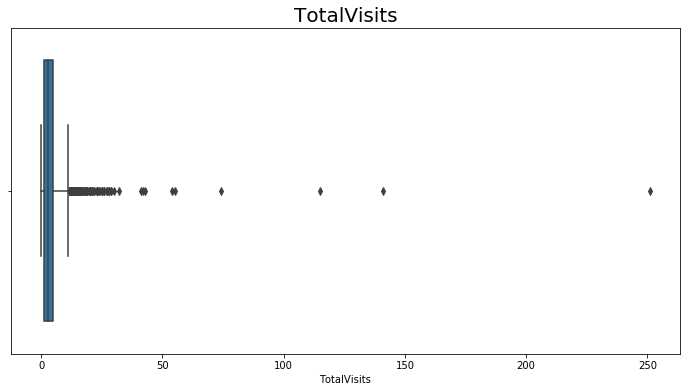

In [38]:
#Plotting 'TotalVisits' to check for outliers
plt.figure(figsize=[12,6])
plt.title('TotalVisits',fontsize=20)
sns.boxplot(lead['TotalVisits'])
plt.show()

- As we can see there are some outliers present in the column, therefore we will impute the missing values with median instead of mean.

In [39]:
#Imputing missing values of column 'TotalVisits' with its median
lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan,lead['TotalVisits'].median())

In [40]:
#checking value counts of 'Page Views Per Visit' column
lead['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64

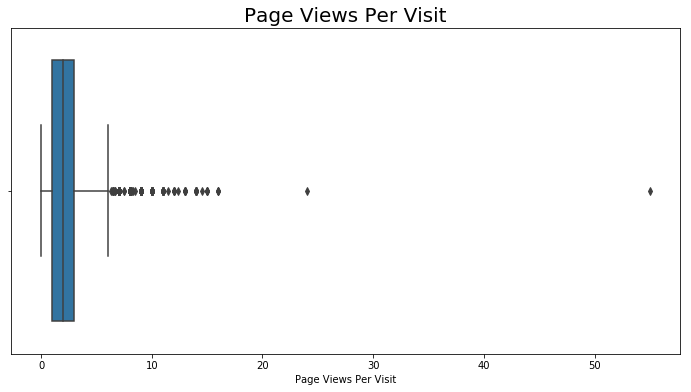

In [41]:
#Plotting 'Page Views Per Visit' to check for outliers
plt.figure(figsize=[12,6])
plt.title('Page Views Per Visit',fontsize=20)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

- As we can see there are some outliers present in the column, therefore we will impute the missing values with median instead of mean.

In [42]:
#imputing missing values of 'Page Views Per Visit' column with its median
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan,lead['Page Views Per Visit'].median())

In [43]:
#rechecking null values percentages
round((lead.isnull().sum()/len(lead))*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [44]:
#checking number of rows with more than 50% missing values
len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])

0

In [45]:
#Checking percentage of retained rows

(len(lead)/9240)*100

100.0

- There are no rows with more than 50% null values so, we can move ahead.

#### Outlier Treatment

In [46]:
#checking summary of numerical variables with detailed percentiles
lead.describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000


- From the above tables, it looks like columns 'TotalVisits' and 'Page Views Per Visit' have outliers and needs to be treated.

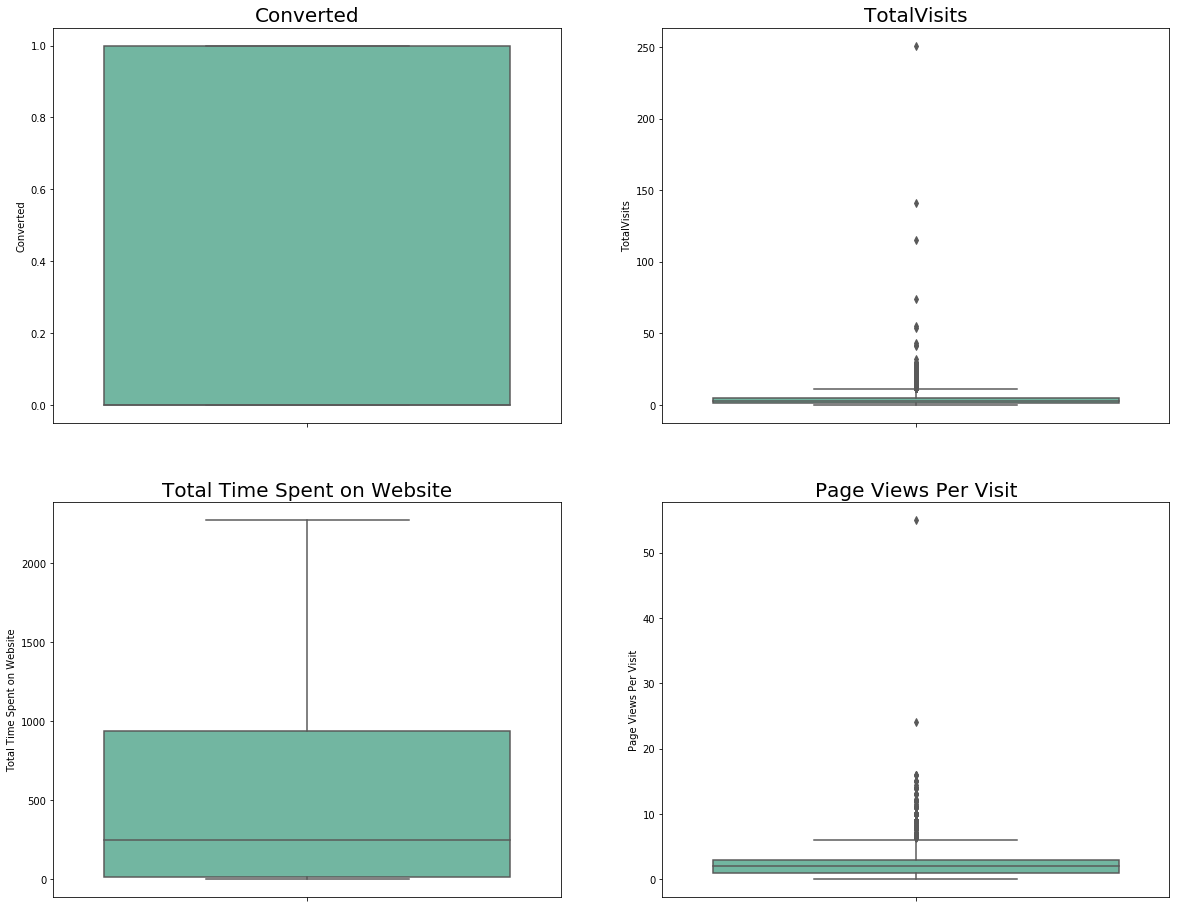

In [47]:
#visuallizing numerical columns to have a better look of the presence of outliers
numerical_col = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

i=1
plt.figure(figsize=[20,16])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(data=lead, y=lead[col], palette = 'Set2')
    plt.title(col,fontsize=20)
    i += 1

- It's clearly visible that columns 'TotalVisits' and 'Page Views Per Visit' have outliers. 
- Presence of outliers can mislead the model and hence would affect the inferences drawn from the model. 
- Therefore, we cap columns 'TotalVisits' and 'Page Views Per Visit' to their 99th percentile.

In [48]:
#capping 'TotalVisits' to its 99th percentile
Q4 = lead['TotalVisits'].quantile(0.99)
lead['TotalVisits'] = np.where(lead['TotalVisits']>Q4, Q4, lead['TotalVisits'])

In [49]:
#capping 'Page Views Per Visit' to its 99th percentile.
Q4 = lead['Page Views Per Visit'].quantile(0.99)
lead['Page Views Per Visit'] = np.where(lead['Page Views Per Visit']>Q4, Q4, lead['Page Views Per Visit'])

In [50]:
#rechecking summary of numerical variables with detailed percentiles
lead.describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.327814,487.698268,2.329050
std,0.486714,3.228466,548.021466,1.971347
min,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000


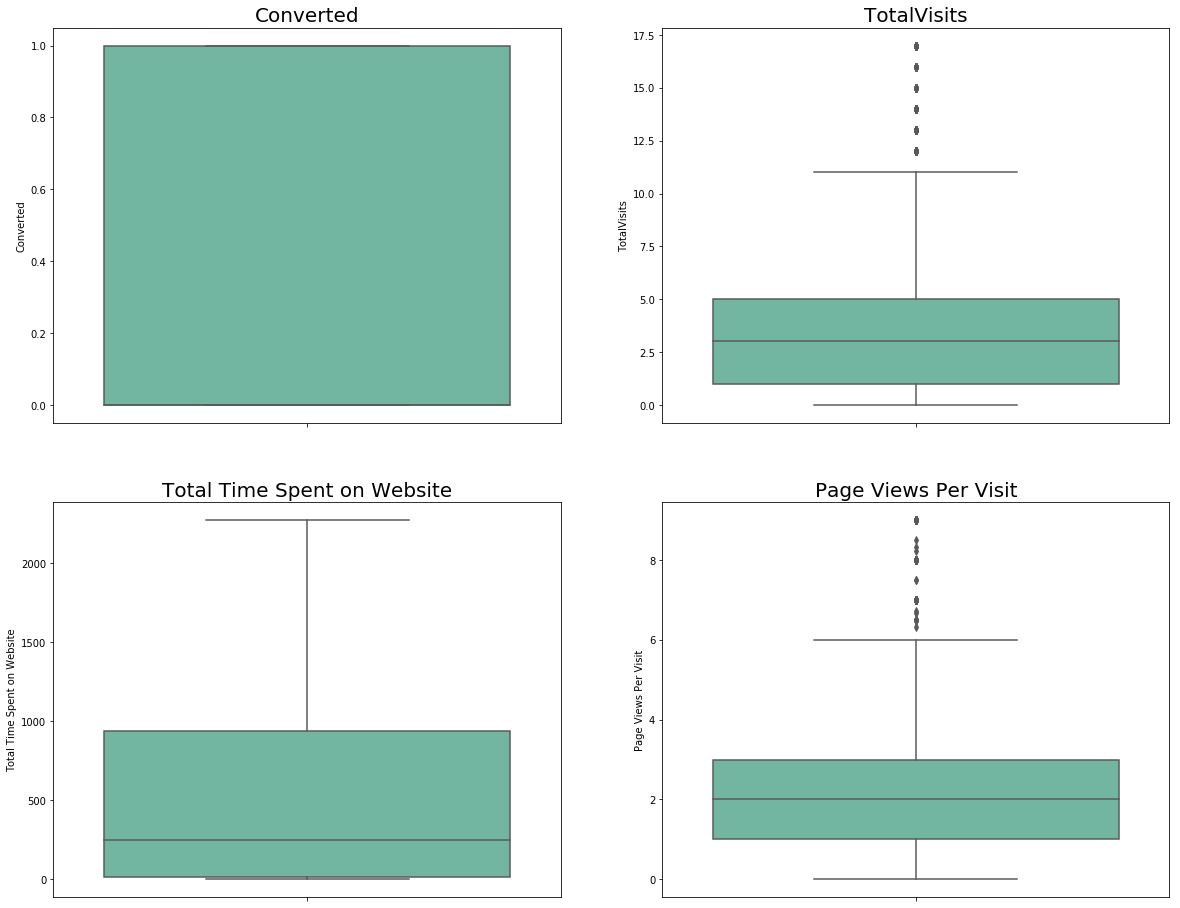

In [51]:
#replotting to check for outliers
i=1
plt.figure(figsize=[20,16])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(data=lead, y=lead[col], palette = 'Set2')
    plt.title(col,fontsize=20)
    i += 1

- The graphs and values look fine after capping

## 3. Exploratory Data Analysis

#### Categorical columns

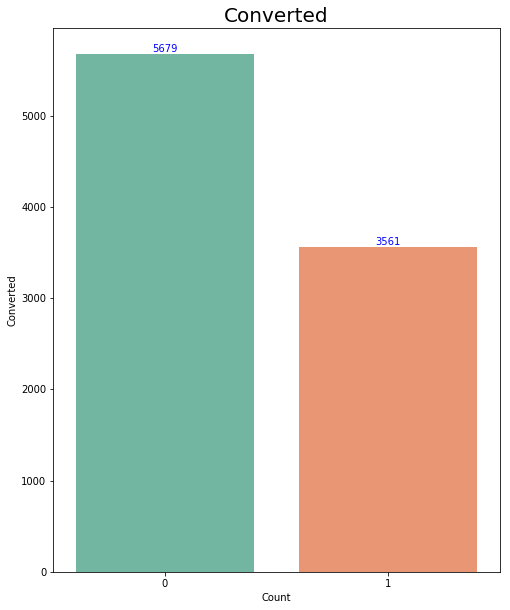

In [52]:
#plotting column 'Converted' to check converted leads
plt.figure(figsize=[8,10])
ax = sns.countplot(x=lead['Converted'], palette='Set2')
plt.title('Converted', fontsize=20)
plt.ylabel('Converted')
plt.xlabel('Count')


#to display the count 
values = lead['Converted'].value_counts().values
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i], ha="center", color='blue', va='bottom')
    
plt.show()

- From the above graph we can get the conversion rate to be 38.5%

In [53]:
#Defining a function for plotting and visualising categorical columns
def cat_plot(col, title, rot):
    plt.figure(figsize=[16,10])
    ax = sns.countplot(x=lead[col],hue=lead['Converted'], palette='Set2')
    plt.title(title, fontsize=20)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=rot)
        
    #to display the count
    for p in ax.patches:
    
        if np.isnan(p.get_height()):
            height = 0
        else:
            height = p.get_height()
    
        height = int(height)
        ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

    plt.show()

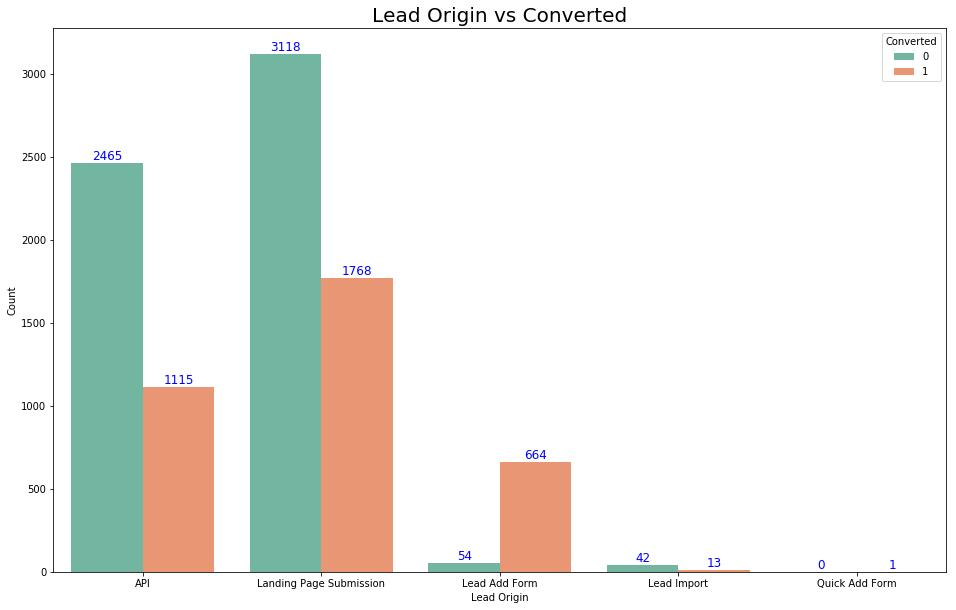

In [54]:
#plotting Lead Origin vs Converted
cat_plot('Lead Origin', 'Lead Origin vs Converted', 0)

- From the above graph we can see that the maximum conversion happened by landing page submission.

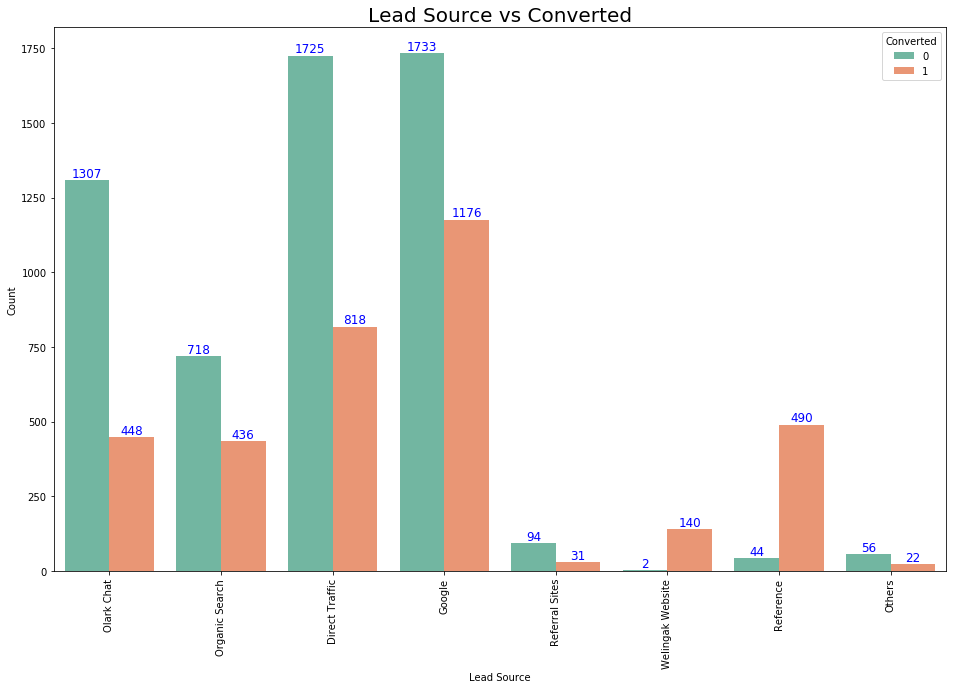

In [55]:
#plotting Lead Source vs Converted
cat_plot('Lead Source', 'Lead Source vs Converted', 90)

- From the above graph we can see Google contributed the most in lead conversion

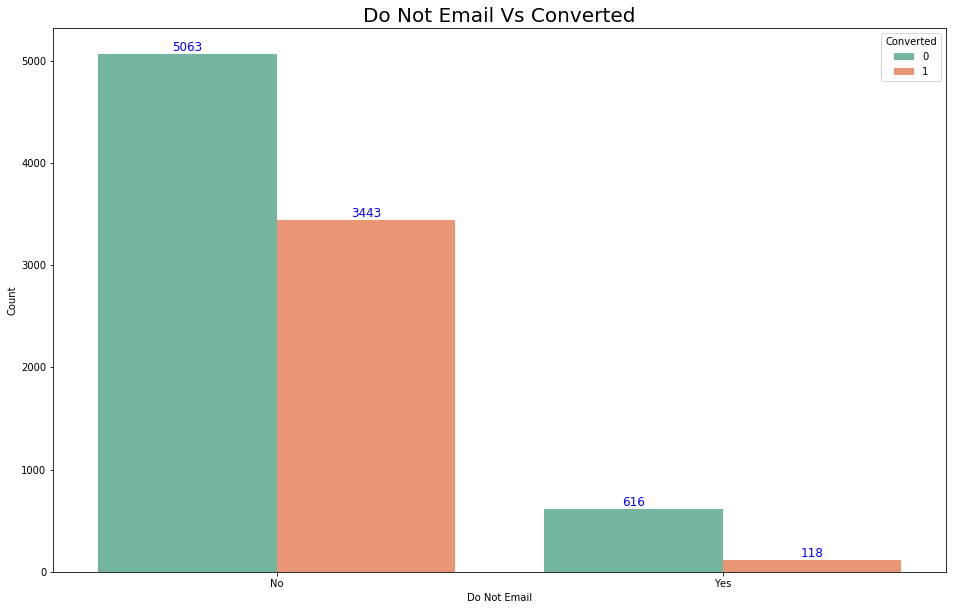

In [56]:
#plotting 'Do Not Email' vs Converted
cat_plot('Do Not Email', 'Do Not Email Vs Converted', 0)

- From the above graph we can see that major conversion happened from sending the email

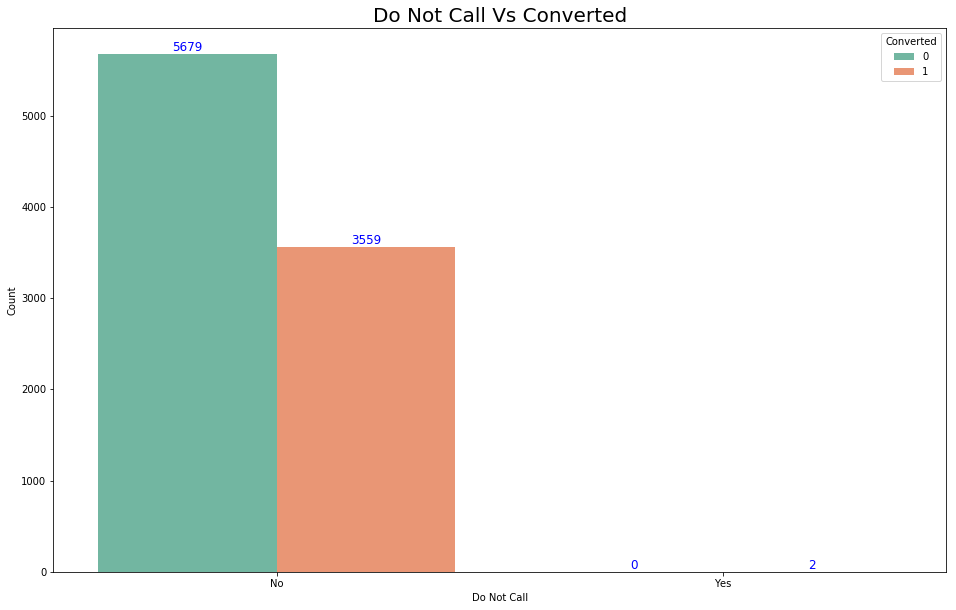

In [57]:
#plotting 'Do Not Call' vs Converted
cat_plot('Do Not Call', 'Do Not Call Vs Converted', 0)

- From the above graph we can see major conversions happened when calls were made. Only two people opted for 'Yes'. so it is safe to drop this column

In [58]:
#dropping the column
lead.drop('Do Not Call', axis=1, inplace=True)

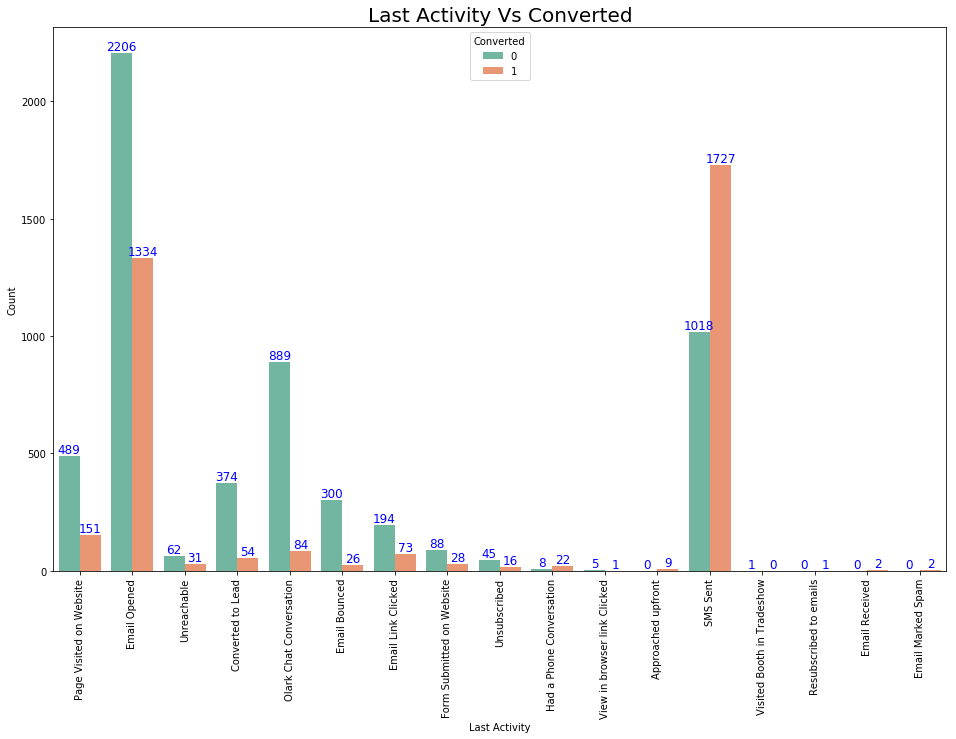

In [59]:
#plotting 'Last Activity' vs Converted
cat_plot('Last Activity', 'Last Activity Vs Converted', 90)

- From the above graph, we can see 'SMS Sent' have most conversions

In [60]:
#dropping 'Last Activity' column as it is sales generated data
lead.drop('Last Activity', axis=1, inplace=True)

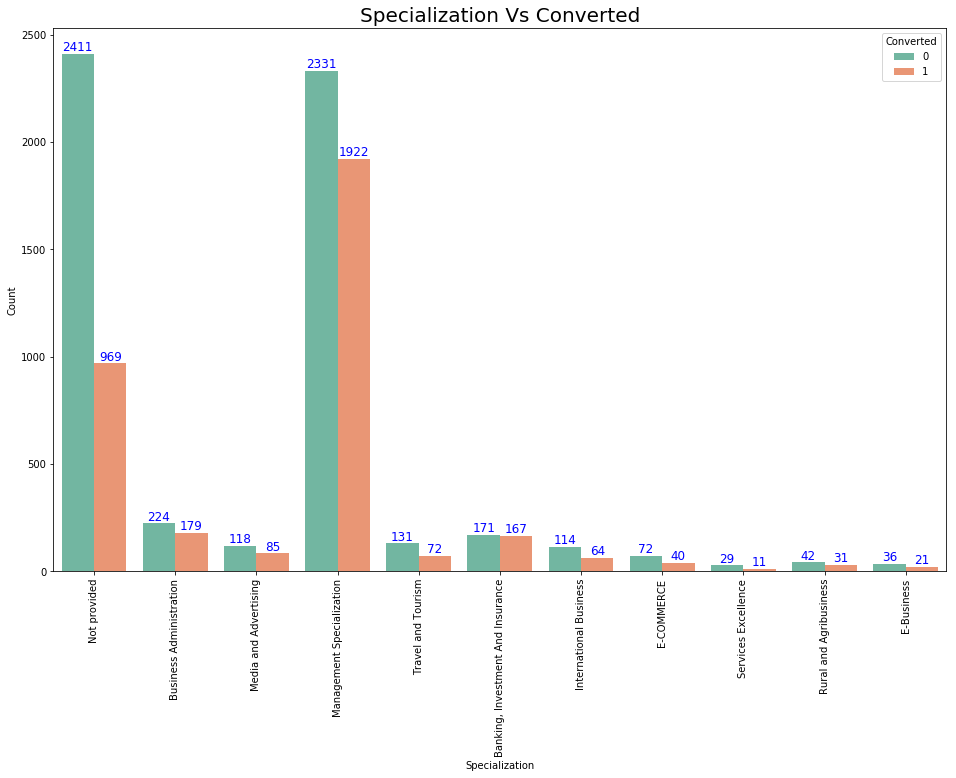

In [61]:
#plotting 'Specialization' vs Converted
cat_plot('Specialization', 'Specialization Vs Converted', 90)

- As we can see, the most conversions happened when specialization is 'Management Specialization'.

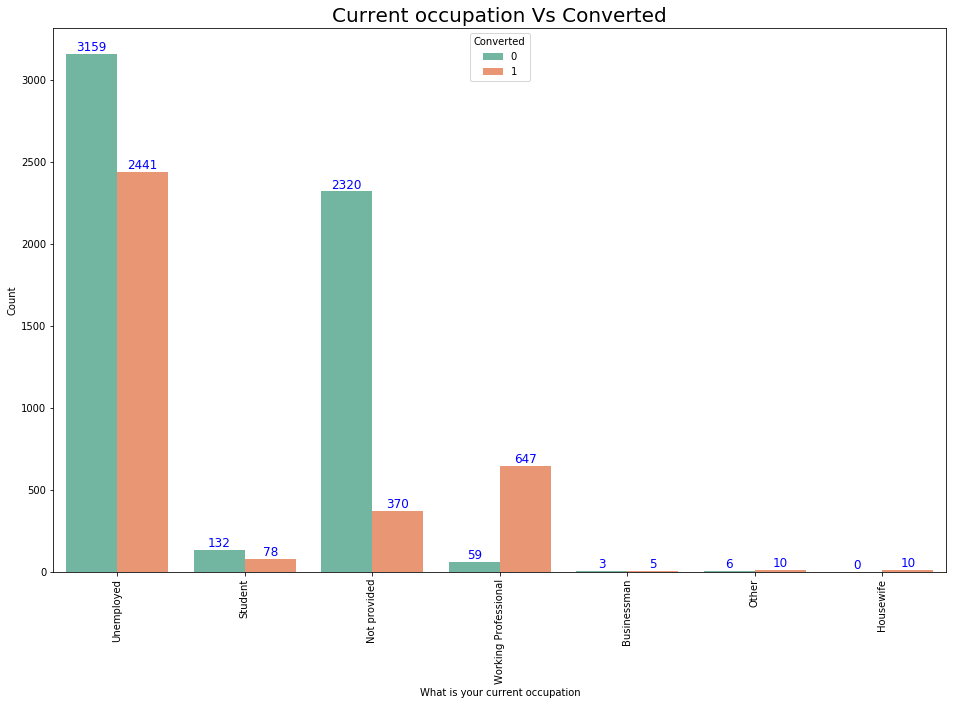

In [62]:
#plotting 'What is your current occupation' vs Converted
cat_plot('What is your current occupation', 'Current occupation Vs Converted', 90)

- As we can see, more conversions happened for unemployed. Also 10 housewives applied and all got converted.

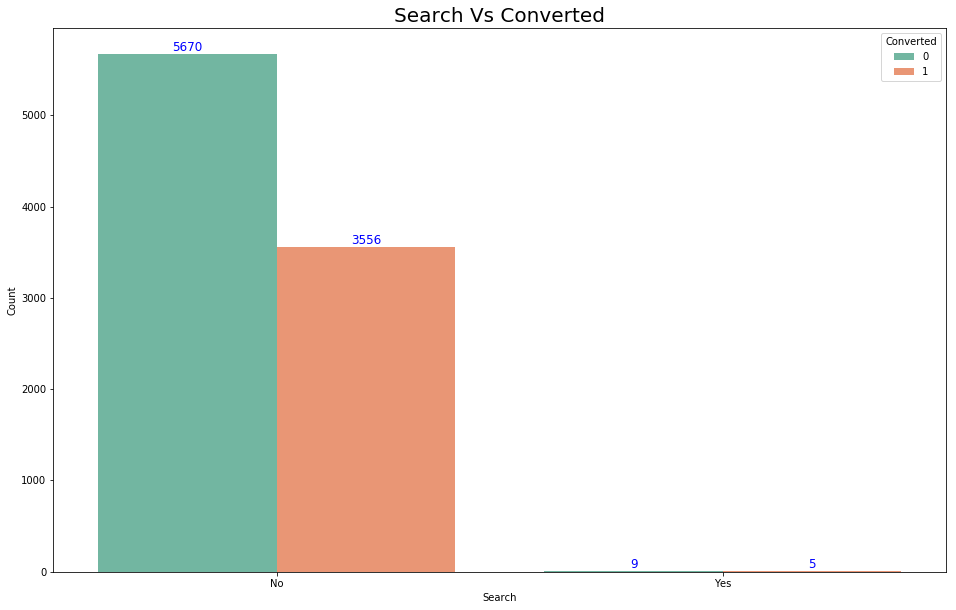

In [63]:
#plotting 'Search' vs Converted
cat_plot('Search', 'Search Vs Converted', 0)

- As we can see, there is more conversion for leads who are not through search.

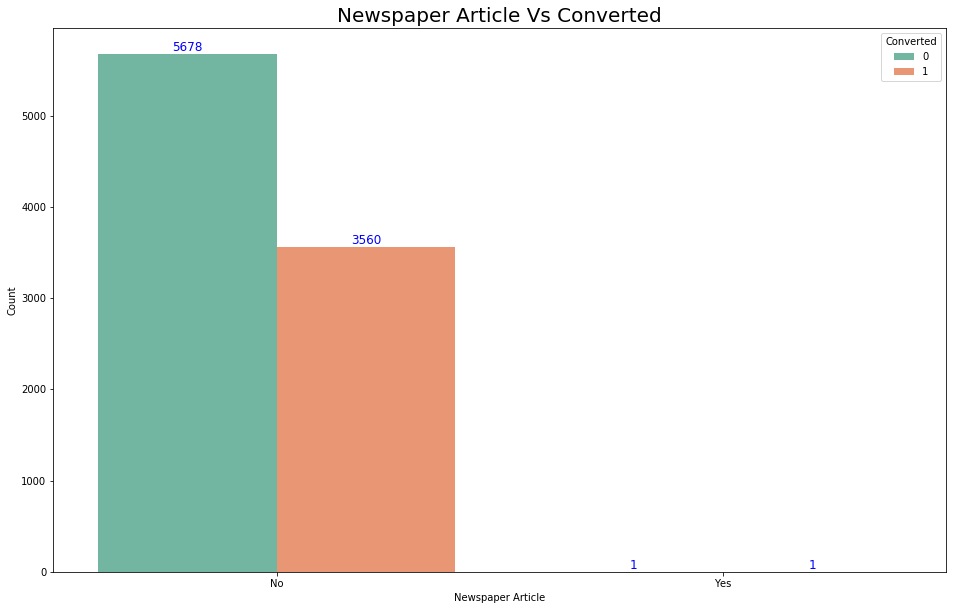

In [64]:
#plotting 'Newspaper Article' vs Converted
cat_plot('Newspaper Article', 'Newspaper Article Vs Converted', 0)

- As we can see there were only 2 leads that came through Newspaper Article out of which 1 got converted. It won't Help with our analysis. so, it is safe to drop this column

In [65]:
#dropping 'Newspaper Article'
lead.drop('Newspaper Article', axis=1, inplace=True)

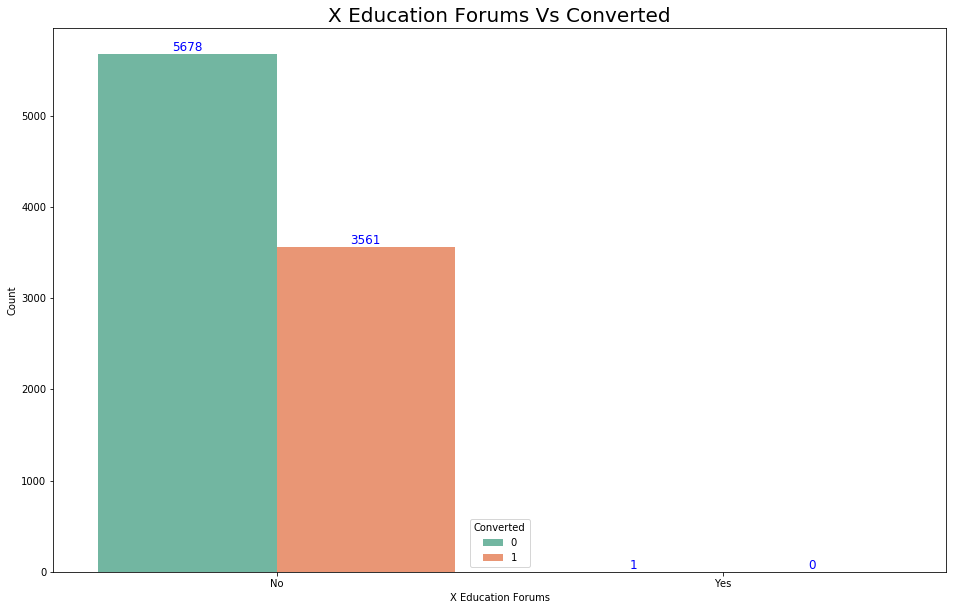

In [66]:
#plotting 'X Education Forums' vs Converted
cat_plot('X Education Forums', 'X Education Forums Vs Converted', 0)

- As we can see there is only one lead through X education Forum which did not even get converted, rest all values are 'No', so its safe to drop this column

In [67]:
#dropping 'X Education Forums' 
lead.drop('X Education Forums', axis=1, inplace=True)

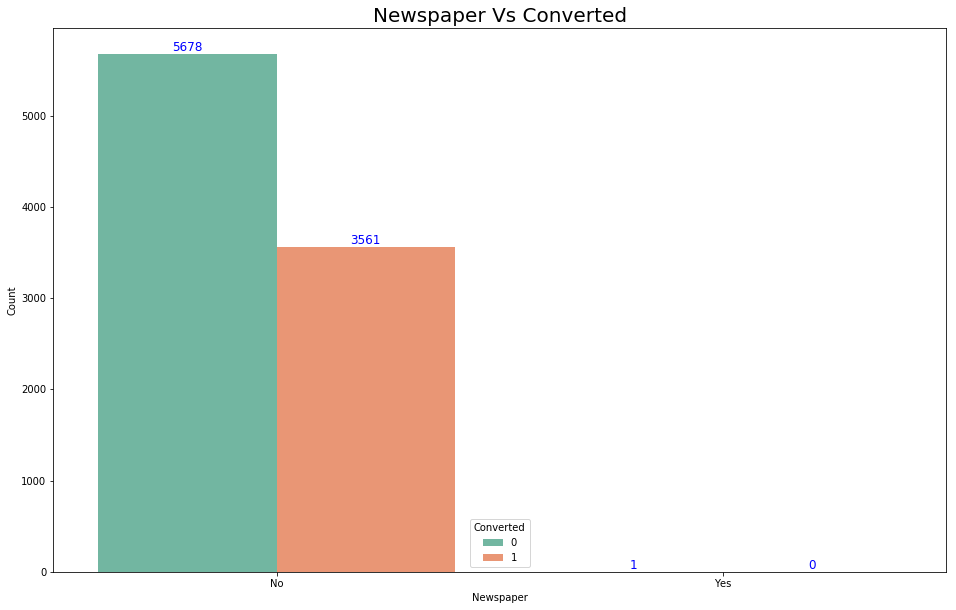

In [68]:
#plotting 'Newspaper' vs Converted
cat_plot('Newspaper', 'Newspaper Vs Converted', 0)

- As we can see, there is only one lead through Newspaper and it did not even get converted, rest all values are 'No', so its safe to drop this column

In [69]:
#dropping 'Newspaper'
lead.drop('Newspaper', axis=1, inplace=True)

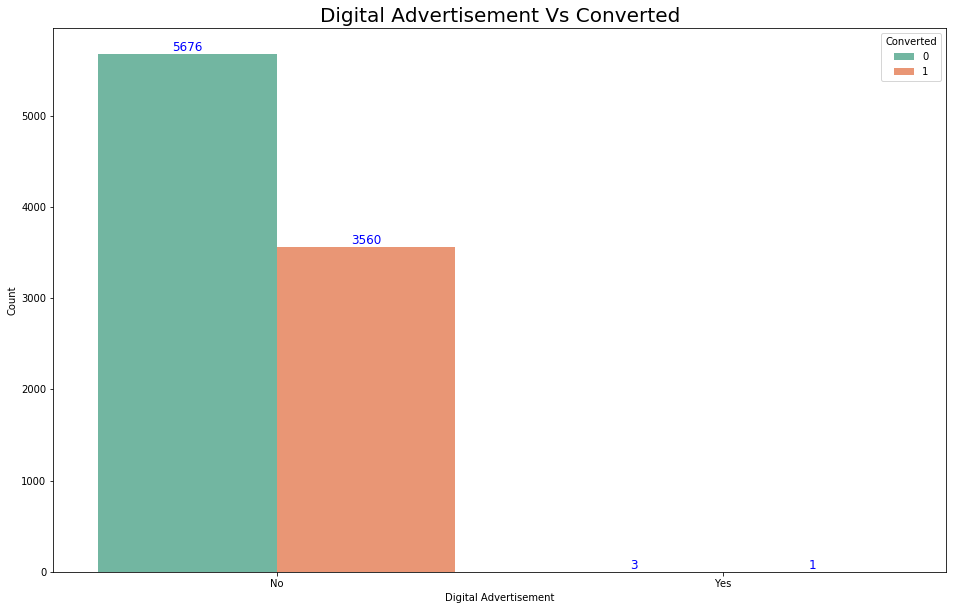

In [70]:
#plotting 'Digital Advertisement' vs Converted
cat_plot('Digital Advertisement', 'Digital Advertisement Vs Converted', 0)

- As we can see there are 4 leads through digital advertisement out of which 1 got converted. It is safe to drop this column as its highly skewed

In [71]:
#dropping 'Digital Advertisement'
lead.drop('Digital Advertisement', axis=1, inplace=True)

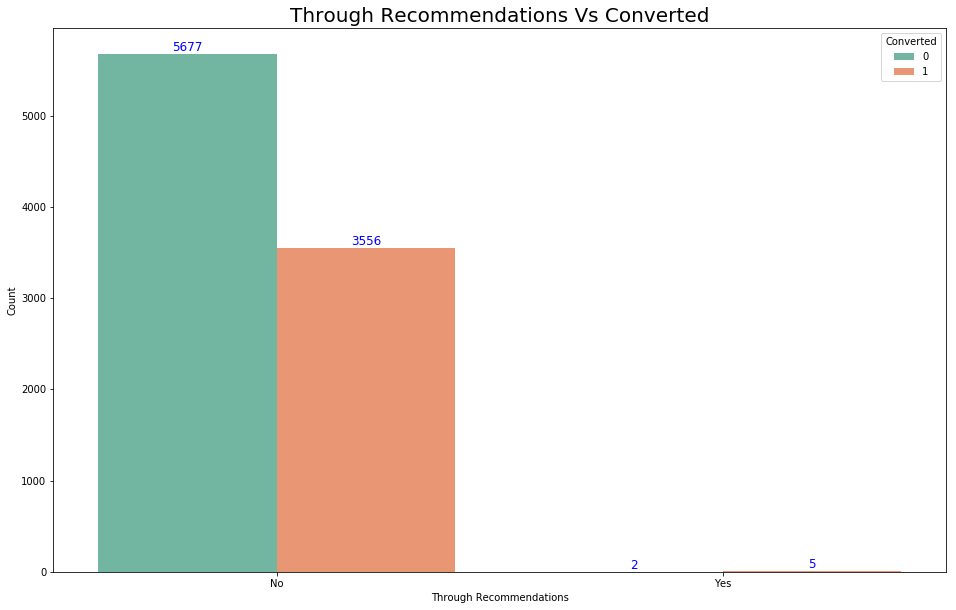

In [72]:
#plotting 'Through Recommendations' vs Converted
cat_plot('Through Recommendations', 'Through Recommendations Vs Converted', 0)

- As we can see there are 7 leads through recommendations out of which 5 got converted

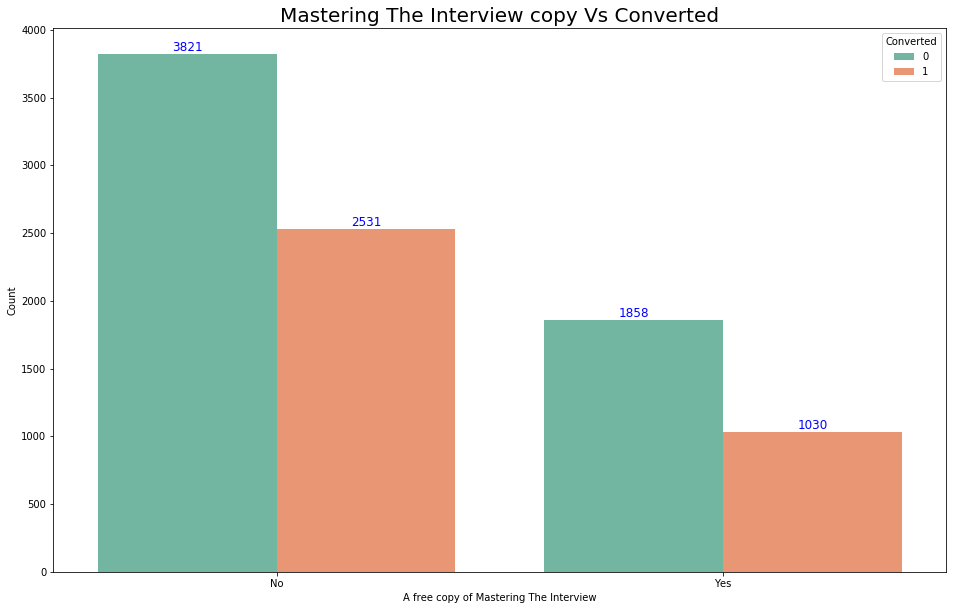

In [73]:
#plotting 'A free copy of Mastering The Interview' vs Converted
cat_plot('A free copy of Mastering The Interview', 'Mastering The Interview copy Vs Converted', 0)

- As we can see, there is more conversion for leads who did not opt for free copy of mastering the interview

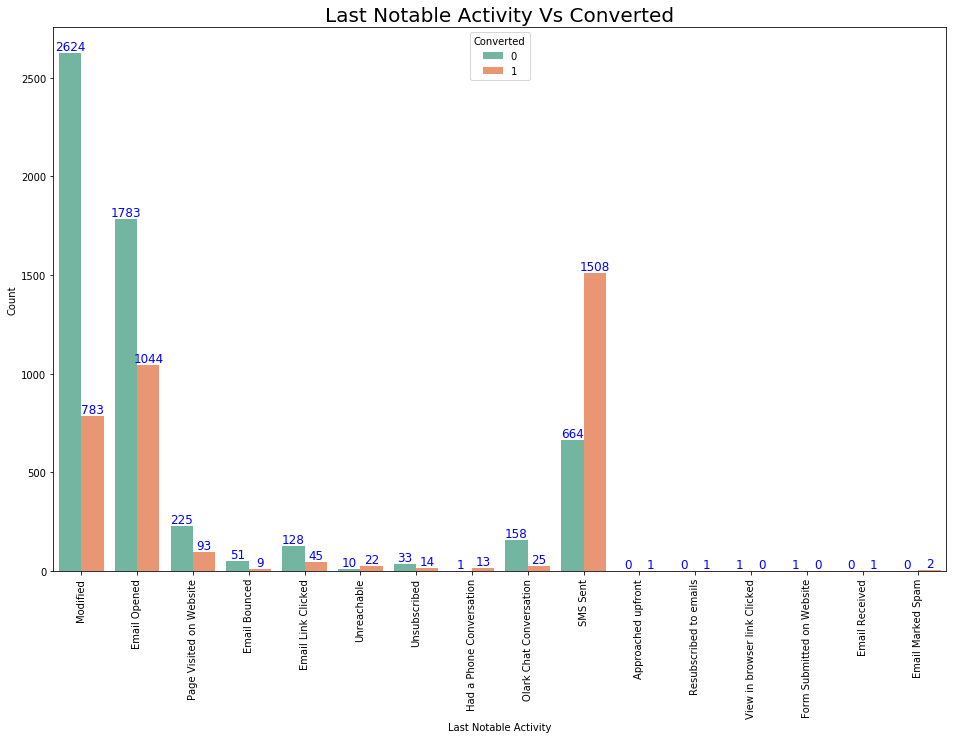

In [74]:
#plotting 'Last Notable Activity' vs Converted
cat_plot('Last Notable Activity', 'Last Notable Activity Vs Converted', 90)

- As we can see, conversion is more for leads with last notable activity as 'SMS Sent'

In [75]:
#dropping this column as it is sales generated data
lead.drop('Last Notable Activity', axis=1, inplace=True)

#### Numerical columns

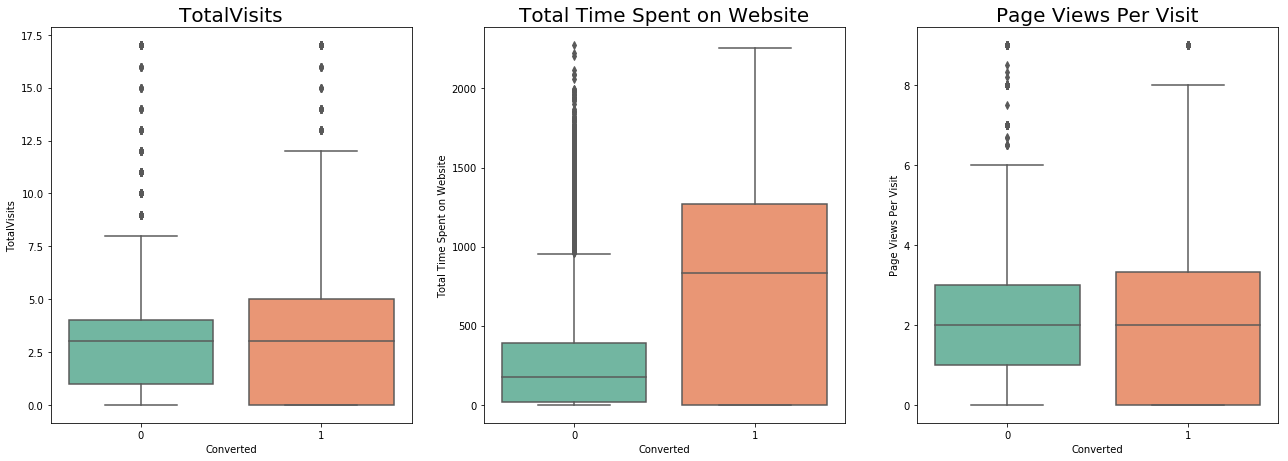

In [76]:
#plotting numerical columns
numer_col=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
i=1
plt.figure(figsize=[22,16])
for col in numer_col:
    plt.subplot(2,3,i)
    sns.boxplot(data=lead, y=lead[col], x=lead['Converted'] , palette = 'Set2')
    plt.title(col,fontsize=20)
    i += 1

- Median for converted and not converted leads is almost same in the case of 'TotalVisits' and 'Page Views Per Visit'.
- It seems leads spending more time on the website have more chances of getting converted.

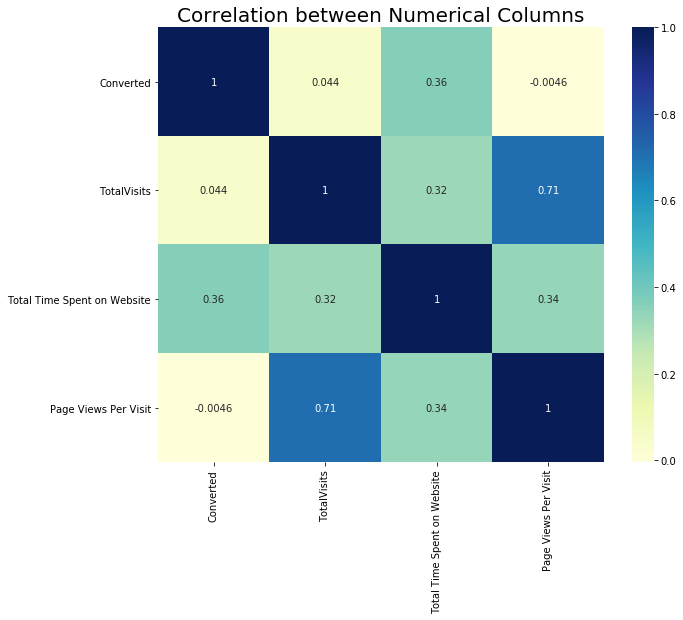

In [77]:
#plotting heatmap to check correlation between numerical columns
plt.figure(figsize=[10,8])
plt.title('Correlation between Numerical Columns',fontsize=20)
sns.heatmap(lead.corr(), annot=True, cmap='YlGnBu')
plt.show()

- Correlation of 'TotalVisits' and 'Page Views Per Visit' is the highest.
- 'Converted' has a decent correlation with 'Total Time Spent on Website'.

## 4. Data Preparation

#### Converting some binary variables Yes/No to 0/1

In [78]:
#list of variables to map
varlist =['Do Not Email', 'Search', 'Through Recommendations', 'A free copy of Mastering The Interview']

#defining map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

#applying the function
lead[varlist] = lead[varlist].apply(binary_map)

In [79]:
#checking the applied changes
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Through Recommendations,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Not provided,Unemployed,0,0,Other Cities,0
1,API,Organic Search,0,0,5.0,674,2.5,Not provided,Unemployed,0,0,Other Cities,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,0,0,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not provided,Unemployed,0,0,Mumbai,0


#### Creating Dummy Features 

In [80]:
#list of categorical columns
cat_columns = lead.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

In [81]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'City']], 
                        drop_first=True)

# Adding the results to the master dataframe
lead= pd.concat([lead, dummy1], axis=1)

In [82]:
#checking the head
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Through Recommendations,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Not provided,Unemployed,0,0,Other Cities,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Not provided,Unemployed,0,0,Other Cities,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,0,0,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not provided,Unemployed,0,0,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [83]:
#checking value counts of column 'What is your current occupation'
lead['What is your current occupation'].value_counts()

Unemployed              5600
Not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [84]:
#checking value counts of column 'Specialization'
lead['Specialization'].value_counts()

Management Specialization            4253
Not provided                         3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [85]:
# Creating dummy variables for the remaining categorical variables and dropping the level 'not provided'
oc = pd.get_dummies(lead['What is your current occupation'], prefix='CurrentOccupation')
oc1 = oc.drop(['CurrentOccupation_Not provided'],1)
lead = pd.concat([lead,oc1],axis=1)

spc = pd.get_dummies(lead['Specialization'], prefix='Specialization')
spc1 = spc.drop(['Specialization_Not provided'],1)
lead = pd.concat([lead,spc1],axis=1)

In [86]:
#checking the head
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Through Recommendations,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Not provided,Unemployed,0,0,Other Cities,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Not provided,Unemployed,0,0,Other Cities,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,0,0,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Not provided,Unemployed,0,0,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [87]:
#dropping the repeated columns
lead = lead.drop(['Lead Origin', 'Lead Source','City', 'Specialization', 'What is your current occupation'], axis=1)

In [88]:
#checking the head
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Checking percentage of missing values after removing the missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Do Not Email                                        0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
Page Views Per Visit                                0.0
Search                                              0.0
Through Recommendations                             0.0
A free copy of Mastering The Interview              0.0
Lead Origin_Landing Page Submission                 0.0
Lead Origin_Lead Add Form                           0.0
Lead Origin_Lead Import                             0.0
Lead Origin_Quick Add Form                          0.0
Lead Source_Google                                  0.0
Lead Source_Olark Chat                              0.0
Lead Source_Organic Search                          0.0
Lead Source_Others                                  0.0
Lead Source_Reference                               0.0
Lead Source_Referral Sites                      

## 5. Test-Train Split

In [90]:
#importing test_train_split
from sklearn.model_selection import train_test_split

In [91]:
#putting feature variable to x
x = lead.drop(['Converted'], axis=1)

x.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [92]:
#putting response variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

## 6. Feature Scaling

In [94]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [95]:
#scaling numerical columns
scaler = StandardScaler()

x_train[numer_col] = scaler.fit_transform(x_train[numer_col])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
1871,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6795,0,0.205373,0.005716,-0.503379,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.512365,-0.691418,0.092260,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.512365,1.365219,1.364995,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3934,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [96]:
#checking conversion rate
converted = (sum(lead['Converted'])/(len(lead['Converted'].index)))*100
converted

38.53896103896104

- We have almost 39% conversion rate

## 7. Model Building

In [97]:
#importing statsmodels
import statsmodels.api as sm

#### Running initial training model

In [98]:
#logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.1
Date:                Mon, 14 Jun 2021   Deviance:                       5676.1
Time:                        15:21:36   Pearson chi2:                 7.86e+03
No. Iterations:                    21   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1647      0.179    -12.115      0.000      -2.515      -1.815
Do Not Email                                        -1.2955      0.163     -7.938      0.000      -1.615      -0.976
TotalVisits                                          0.1959      0.046      4.306      0.000       0.107       0.285
Total Time Spent on Website                          1.0705      0.039     27.760      0.000       0.995       1.146
Page Views Per Visit                                -0.1213      0.053     -2.306      0.021      -0.224      -0.018
Search                                              -0.0526      0.807     -0.065      0.948      -1.635       1.530
Through Recommendations                              0.1522      1.131      0.135      0.893      -2.065       2.369
A free copy of Mastering The Interview              -0.2429      0.104     -2.337      0.019      -0.447      -0.039
Lead Origin_Landing Page Submission                 -0.6865      0.135     -5.074      0.000      -0.952      -0.421
Lead Origin_Lead Add Form                            3.0770      0.478      6.436      0.000       2.140       4.014
Lead Origin_Lead Import                             -0.7969      0.811     -0.983      0.326      -2.386       0.792
Lead Origin_Quick Add Form                          19.7193   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                   0.2193      0.110      1.997      0.046       0.004       0.434
Lead Source_Olark Chat                               1.1047      0.153      7.225      0.000       0.805       1.404
Lead Source_Organic Search                           0.1382      0.126      1.098      0.272      -0.109       0.385
Lead Source_Others                                   0.3493      0.624      0.560      0.575      -0.873       1.572
Lead Source_Reference                                0.2730      0.518      0.527      0.598      -0.742       1.288
Lead Source_Referral Sites                          -0.2850      0.318     -0.896      0.370      -0.908       0.338
Lead Source_Welingak Website                         2.7793      0.863      3.222      0.001       1.088       4.470
City_Other Cities                                   -0.0636      0.112     -0.566      0.571      -0.284       0.157
City_Other Cities of Maharashtra                     0.1145      0.159      0.720      0.471      -0.197       0.426
City_Other Metro Cities                              0.2657      0.166      1.602      0.109      -0.059       0.591
City_Thane & Outskirts                              -0.0717      0.129     -0.557      0.578      -0.324       0.181
City_Tier II Cities                                 -0.2953      0.388     -0.761      0.447      -1.056       0.466
Cur

#### Feature Selection using RFE

In [99]:
#importing LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [100]:
#running RFE with output number of variables equal to 20
from sklearn.feature_selection import RFE
rfe = RFE(logreg,20)
rfe = rfe.fit(x_train, y_train)

In [101]:
#checking rfe support
rfe.support_

array([ True, False,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

In [102]:
#list of column with rfe ranking
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Search', False, 20),
 ('Through Recommendations', False, 18),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('City_Other Cities', False, 15),
 ('City_Other Cities of Maharashtra', False, 12),
 ('City_Other Metro Cities', False, 7),
 ('City_Thane & Outskirts', False, 17),
 ('City_Tier II Cities', False, 4),
 ('CurrentOccupation_Businessman', False, 6),
 ('CurrentOccupation_Housewife', True, 1),

In [103]:
#columns selected by rfe
col = x_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'CurrentOccupation_Housewife',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Management Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism'],
      dtype='object')

#### Assessing the model with StatsModels

In [104]:
#Rebuilding Model 2
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.1
Date:                Mon, 14 Jun 2021   Deviance:                       5724.2
Time:                        15:21:37   Pearson chi2:                 7.76e+03
No. Iterations:                    21   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.0271      0.099    -20.450      0.000      -2.221      -1.833
Do Not Email                                        -1.3091      0.160     -8.174      0.000      -1.623      -0.995
Total Time Spent on Website                          1.0775      0.038     28.161      0.000       1.002       1.152
Lead Origin_Landing Page Submission                 -0.7681      0.118     -6.516      0.000      -0.999      -0.537
Lead Origin_Lead Add Form                            3.1421      0.200     15.738      0.000       2.751       3.533
Lead Origin_Lead Import                             -0.5388      0.527     -1.022      0.307      -1.571       0.494
Lead Source_Olark Chat                               0.8742      0.114      7.664      0.000       0.651       1.098
Lead Source_Welingak Website                         2.4739      0.743      3.330      0.001       1.018       3.930
CurrentOccupation_Housewife                         23.4832   1.35e+04      0.002      0.999   -2.64e+04    2.65e+04
CurrentOccupation_Student                            1.0509      0.228      4.611      0.000       0.604       1.498
CurrentOccupation_Unemployed                         1.1841      0.083     14.260      0.000       1.021       1.347
CurrentOccupation_Working Professional               3.5950      0.195     18.429      0.000       3.213       3.977
Specialization_Banking, Investment And Insurance     1.0417      0.199      5.235      0.000       0.652       1.432
Specialization_Business Administration               0.7383      0.188      3.921      0.000       0.369       1.107
Specialization_E-Business                            0.7316      0.431      1.696      0.090      -0.114       1.577
Specialization_E-COMMERCE                            1.1098      0.294      3.771      0.000       0.533       1.687
Specialization_Management Specialization             0.8147      0.112      7.264      0.000       0.595       1.035
Specialization_Media and Advertising                 1.0198      0.239      4.267      0.000       0.551       1.488
Specialization_Rural and Agribusiness                1.2921      0.383      3.370      0.001       0.541       2.043
Specialization_Services Excellence                   0.7790      0.518      1.504      0.133      -0.236       1.794
Specialization_Travel and Tourism                    0.8588      0.247      3.472      0.001       0.374       1.344
====================================================================================================================
"""

In [105]:
#Removing column 'CurrentOccupation_Housewife' as it has the highest p-value
col = col.drop('CurrentOccupation_Housewife', 1)

In [106]:
#Rebuilding Model 3
x_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.3
Date:                Mon, 14 Jun 2021   Deviance:                       5742.7
Time:                        15:21:37   Pearson chi2:                 7.82e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.0082      0.099    -20.357      0.000      -2.202      -1.815
Do Not Email                                        -1.3167      0.160     -8.222      0.000      -1.631      -1.003
Total Time Spent on Website                          1.0761      0.038     28.174      0.000       1.001       1.151
Lead Origin_Landing Page Submission                 -0.7671      0.118     -6.514      0.000      -0.998      -0.536
Lead Origin_Lead Add Form                            3.1726      0.199     15.909      0.000       2.782       3.564
Lead Origin_Lead Import                             -0.5398      0.527     -1.024      0.306      -1.572       0.493
Lead Source_Olark Chat                               0.8705      0.114      7.638      0.000       0.647       1.094
Lead Source_Welingak Website                         2.4521      0.743      3.300      0.001       0.996       3.908
CurrentOccupation_Student                            1.0259      0.228      4.503      0.000       0.579       1.472
CurrentOccupation_Unemployed                         1.1569      0.082     14.058      0.000       0.996       1.318
CurrentOccupation_Working Professional               3.5649      0.195     18.306      0.000       3.183       3.947
Specialization_Banking, Investment And Insurance     1.0453      0.199      5.256      0.000       0.656       1.435
Specialization_Business Administration               0.7627      0.188      4.064      0.000       0.395       1.131
Specialization_E-Business                            0.7326      0.431      1.698      0.089      -0.113       1.578
Specialization_E-COMMERCE                            1.1128      0.294      3.785      0.000       0.537       1.689
Specialization_Management Specialization             0.8249      0.112      7.365      0.000       0.605       1.044
Specialization_Media and Advertising                 1.0584      0.237      4.457      0.000       0.593       1.524
Specialization_Rural and Agribusiness                1.2971      0.383      3.385      0.001       0.546       2.048
Specialization_Services Excellence                   0.7830      0.517      1.514      0.130      -0.231       1.797
Specialization_Travel and Tourism                    0.8622      0.247      3.490      0.000       0.378       1.347
====================================================================================================================
"""

In [107]:
#Removing column 'Lead Origin_Lead Import' as it has the highest p-value
col = col.drop('Lead Origin_Lead Import', 1)

In [108]:
#Rebuilding Model 4
x_train_sm = sm.add_constant(x_train[col])
logm4 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.9
Date:                Mon, 14 Jun 2021   Deviance:                       5743.8
Time:                        15:21:37   Pearson chi2:                 7.82e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.0189      0.098    -20.553      0.000      -2.211      -1.826
Do Not Email                                        -1.3153      0.160     -8.212      0.000      -1.629      -1.001
Total Time Spent on Website                          1.0782      0.038     28.254      0.000       1.003       1.153
Lead Origin_Landing Page Submission                 -0.7527      0.117     -6.439      0.000      -0.982      -0.524
Lead Origin_Lead Add Form                            3.1874      0.199     16.022      0.000       2.798       3.577
Lead Source_Olark Chat                               0.8841      0.113      7.801      0.000       0.662       1.106
Lead Source_Welingak Website                         2.4506      0.743      3.299      0.001       0.994       3.907
CurrentOccupation_Student                            1.0265      0.228      4.505      0.000       0.580       1.473
CurrentOccupation_Unemployed                         1.1558      0.082     14.044      0.000       0.994       1.317
CurrentOccupation_Working Professional               3.5630      0.195     18.302      0.000       3.181       3.945
Specialization_Banking, Investment And Insurance     1.0431      0.199      5.247      0.000       0.653       1.433
Specialization_Business Administration               0.7577      0.188      4.036      0.000       0.390       1.126
Specialization_E-Business                            0.7294      0.432      1.690      0.091      -0.116       1.575
Specialization_E-COMMERCE                            1.1106      0.294      3.778      0.000       0.534       1.687
Specialization_Management Specialization             0.8211      0.112      7.343      0.000       0.602       1.040
Specialization_Media and Advertising                 1.0513      0.237      4.432      0.000       0.586       1.516
Specialization_Rural and Agribusiness                1.2946      0.383      3.378      0.001       0.543       2.046
Specialization_Services Excellence                   0.7809      0.517      1.510      0.131      -0.233       1.794
Specialization_Travel and Tourism                    0.8590      0.247      3.477      0.001       0.375       1.343
====================================================================================================================
"""

In [109]:
#Removing column 'Specialization_Services Excellence' as it has the highest p-value
col = col.drop('Specialization_Services Excellence', 1)

In [110]:
#Rebuilding Model 5
x_train_sm = sm.add_constant(x_train[col])
logm5 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.0
Date:                Mon, 14 Jun 2021   Deviance:                       5745.9
Time:                        15:21:37   Pearson chi2:                 7.80e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.0135      0.098    -20.523      0.000      -2.206      -1.821
Do Not Email                                        -1.3085      0.160     -8.175      0.000      -1.622      -0.995
Total Time Spent on Website                          1.0784      0.038     28.258      0.000       1.004       1.153
Lead Origin_Landing Page Submission                 -0.7291      0.116     -6.300      0.000      -0.956      -0.502
Lead Origin_Lead Add Form                            3.1910      0.199     16.052      0.000       2.801       3.581
Lead Source_Olark Chat                               0.8817      0.113      7.789      0.000       0.660       1.104
Lead Source_Welingak Website                         2.4386      0.743      3.283      0.001       0.983       3.894
CurrentOccupation_Student                            1.0252      0.228      4.504      0.000       0.579       1.471
CurrentOccupation_Unemployed                         1.1581      0.082     14.073      0.000       0.997       1.319
CurrentOccupation_Working Professional               3.5722      0.195     18.365      0.000       3.191       3.953
Specialization_Banking, Investment And Insurance     1.0155      0.198      5.135      0.000       0.628       1.403
Specialization_Business Administration               0.7298      0.187      3.909      0.000       0.364       1.096
Specialization_E-Business                            0.6997      0.431      1.624      0.104      -0.145       1.544
Specialization_E-COMMERCE                            1.0809      0.293      3.687      0.000       0.506       1.655
Specialization_Management Specialization             0.7932      0.110      7.204      0.000       0.577       1.009
Specialization_Media and Advertising                 1.0224      0.236      4.325      0.000       0.559       1.486
Specialization_Rural and Agribusiness                1.2670      0.383      3.312      0.001       0.517       2.017
Specialization_Travel and Tourism                    0.8291      0.246      3.370      0.001       0.347       1.311
====================================================================================================================
"""

In [111]:
#Removing column 'Specialization_E-Business' as it has the highest p-value
col = col.drop('Specialization_E-Business', 1)

In [112]:
#Rebuilding Model 6
x_train_sm = sm.add_constant(x_train[col])
logm6 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.2
Date:                Mon, 14 Jun 2021   Deviance:                       5748.4
Time:                        15:21:37   Pearson chi2:                 7.77e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.0066      0.098    -20.493      0.000      -2.199      -1.815
Do Not Email                                        -1.3116      0.160     -8.194      0.000      -1.625      -0.998
Total Time Spent on Website                          1.0794      0.038     28.278      0.000       1.005       1.154
Lead Origin_Landing Page Submission                 -0.6966      0.114     -6.121      0.000      -0.920      -0.474
Lead Origin_Lead Add Form                            3.2041      0.198     16.143      0.000       2.815       3.593
Lead Source_Olark Chat                               0.8807      0.113      7.789      0.000       0.659       1.102
Lead Source_Welingak Website                         2.4196      0.743      3.258      0.001       0.964       3.875
CurrentOccupation_Student                            1.0221      0.227      4.495      0.000       0.576       1.468
CurrentOccupation_Unemployed                         1.1598      0.082     14.102      0.000       0.999       1.321
CurrentOccupation_Working Professional               3.5733      0.194     18.385      0.000       3.192       3.954
Specialization_Banking, Investment And Insurance     0.9794      0.196      4.989      0.000       0.595       1.364
Specialization_Business Administration               0.6937      0.185      3.745      0.000       0.331       1.057
Specialization_E-COMMERCE                            1.0432      0.292      3.572      0.000       0.471       1.616
Specialization_Management Specialization             0.7570      0.108      7.033      0.000       0.546       0.968
Specialization_Media and Advertising                 0.9852      0.235      4.187      0.000       0.524       1.446
Specialization_Rural and Agribusiness                1.2319      0.382      3.228      0.001       0.484       1.980
Specialization_Travel and Tourism                    0.7912      0.245      3.233      0.001       0.312       1.271
====================================================================================================================
"""

- Judging from the p-values of all the retained features seem to be very significant. But we will also check its VIF values to check presence of multicollinearity.

In [113]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs 
vif = pd.DataFrame() 
vif['Features'] = x_train[col].columns 
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])] 
vif['VIF'] = round(vif['VIF'], 2) 
vif = vif.sort_values(by = "VIF", ascending = False) 
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,5.35
12,Specialization_Management Specialization,4.73
7,CurrentOccupation_Unemployed,2.39
3,Lead Origin_Lead Add Form,1.79
8,CurrentOccupation_Working Professional,1.41
4,Lead Source_Olark Chat,1.37
10,Specialization_Business Administration,1.36
9,"Specialization_Banking, Investment And Insurance",1.28
5,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.25


- Our intuition was right, high VIF value from the above table clearly indicates presence of multicollinearity & so we need to deal with it.

In [115]:
#Removing column 'Lead Origin_Landing Page Submission' as it has the highest VIF value
col = col.drop('Lead Origin_Landing Page Submission', 1)

In [116]:
#Rebuilding Model 7
x_train_sm = sm.add_constant(x_train[col])
logm7 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2893.2
Date:                Mon, 14 Jun 2021   Deviance:                       5786.4
Time:                        15:21:38   Pearson chi2:                 7.51e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.2149      0.094    -23.618      0.000      -2.399      -2.031
Do Not Email                                        -1.3511      0.159     -8.480      0.000      -1.663      -1.039
Total Time Spent on Website                          1.0890      0.038     28.568      0.000       1.014       1.164
Lead Origin_Lead Add Form                            3.6064      0.187     19.289      0.000       3.240       3.973
Lead Source_Olark Chat                               1.1570      0.105     11.041      0.000       0.952       1.362
Lead Source_Welingak Website                         2.2447      0.742      3.025      0.002       0.790       3.699
CurrentOccupation_Student                            1.0088      0.224      4.495      0.000       0.569       1.449
CurrentOccupation_Unemployed                         1.1739      0.082     14.323      0.000       1.013       1.335
CurrentOccupation_Working Professional               3.6247      0.193     18.802      0.000       3.247       4.003
Specialization_Banking, Investment And Insurance     0.5646      0.182      3.104      0.002       0.208       0.921
Specialization_Business Administration               0.2714      0.171      1.590      0.112      -0.063       0.606
Specialization_E-COMMERCE                            0.5974      0.280      2.133      0.033       0.048       1.146
Specialization_Management Specialization             0.3380      0.082      4.120      0.000       0.177       0.499
Specialization_Media and Advertising                 0.5444      0.225      2.417      0.016       0.103       0.986
Specialization_Rural and Agribusiness                0.8154      0.372      2.189      0.029       0.085       1.545
Specialization_Travel and Tourism                    0.3394      0.231      1.470      0.142      -0.113       0.792
====================================================================================================================
"""

In [117]:
#Removing column 'Specialization_Business Administration' as it has the highest p-value
col = col.drop('Specialization_Business Administration', 1)

In [118]:
#Rebuilding Model 8
x_train_sm = sm.add_constant(x_train[col])
logm8 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.5
Date:                Mon, 14 Jun 2021   Deviance:                       5788.9
Time:                        15:21:38   Pearson chi2:                 7.52e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1798      0.091    -23.985      0.000      -2.358      -2.002
Do Not Email                                        -1.3501      0.159     -8.471      0.000      -1.662      -1.038
Total Time Spent on Website                          1.0908      0.038     28.627      0.000       1.016       1.166
Lead Origin_Lead Add Form                            3.5942      0.187     19.266      0.000       3.229       3.960
Lead Source_Olark Chat                               1.1286      0.103     10.959      0.000       0.927       1.330
Lead Source_Welingak Website                         2.2200      0.742      2.993      0.003       0.766       3.674
CurrentOccupation_Student                            1.0092      0.224      4.503      0.000       0.570       1.448
CurrentOccupation_Unemployed                         1.1810      0.082     14.429      0.000       1.021       1.341
CurrentOccupation_Working Professional               3.6442      0.192     18.947      0.000       3.267       4.021
Specialization_Banking, Investment And Insurance     0.5249      0.180      2.914      0.004       0.172       0.878
Specialization_E-COMMERCE                            0.5568      0.279      1.995      0.046       0.010       1.104
Specialization_Management Specialization             0.2977      0.078      3.826      0.000       0.145       0.450
Specialization_Media and Advertising                 0.5037      0.224      2.250      0.024       0.065       0.942
Specialization_Rural and Agribusiness                0.7774      0.372      2.091      0.037       0.049       1.506
Specialization_Travel and Tourism                    0.2992      0.230      1.303      0.193      -0.151       0.749
====================================================================================================================
"""

In [119]:
#Removing column 'Specialization_Travel and Tourism' as it has the highest p-value
col = col.drop('Specialization_Travel and Tourism', 1)

In [120]:
#Rebuilding Model 9
x_train_sm = sm.add_constant(x_train[col])
logm9 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.3
Date:                Mon, 14 Jun 2021   Deviance:                       5790.6
Time:                        15:21:38   Pearson chi2:                 7.50e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1604      0.089    -24.142      0.000      -2.336      -1.985
Do Not Email                                        -1.3386      0.159     -8.409      0.000      -1.651      -1.027
Total Time Spent on Website                          1.0916      0.038     28.644      0.000       1.017       1.166
Lead Origin_Lead Add Form                            3.5816      0.186     19.242      0.000       3.217       3.946
Lead Source_Olark Chat                               1.1125      0.102     10.897      0.000       0.912       1.313
Lead Source_Welingak Website                         2.2096      0.742      2.979      0.003       0.756       3.663
CurrentOccupation_Student                            1.0134      0.224      4.524      0.000       0.574       1.452
CurrentOccupation_Unemployed                         1.1829      0.082     14.457      0.000       1.023       1.343
CurrentOccupation_Working Professional               3.6508      0.192     18.992      0.000       3.274       4.028
Specialization_Banking, Investment And Insurance     0.5043      0.179      2.811      0.005       0.153       0.856
Specialization_E-COMMERCE                            0.5350      0.279      1.921      0.055      -0.011       1.081
Specialization_Management Specialization             0.2768      0.076      3.641      0.000       0.128       0.426
Specialization_Media and Advertising                 0.4822      0.223      2.161      0.031       0.045       0.920
Specialization_Rural and Agribusiness                0.7565      0.371      2.037      0.042       0.029       1.484
====================================================================================================================
"""

In [121]:
#Removing column 'Specialization_E-COMMERCE' as it has the highest p-value
col = col.drop('Specialization_E-COMMERCE', 1)

In [122]:
#Rebuilding Model 10
x_train_sm = sm.add_constant(x_train[col])
logm10 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.1
Date:                Mon, 14 Jun 2021   Deviance:                       5794.2
Time:                        15:21:38   Pearson chi2:                 7.50e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1377      0.088    -24.157      0.000      -2.311      -1.964
Do Not Email                                        -1.3331      0.159     -8.383      0.000      -1.645      -1.021
Total Time Spent on Website                          1.0898      0.038     28.636      0.000       1.015       1.164
Lead Origin_Lead Add Form                            3.5654      0.186     19.192      0.000       3.201       3.930
Lead Source_Olark Chat                               1.0909      0.101     10.773      0.000       0.892       1.289
Lead Source_Welingak Website                         2.1985      0.742      2.965      0.003       0.745       3.652
CurrentOccupation_Student                            1.0097      0.224      4.513      0.000       0.571       1.448
CurrentOccupation_Unemployed                         1.1855      0.082     14.494      0.000       1.025       1.346
CurrentOccupation_Working Professional               3.6615      0.192     19.048      0.000       3.285       4.038
Specialization_Banking, Investment And Insurance     0.4814      0.179      2.692      0.007       0.131       0.832
Specialization_Management Specialization             0.2536      0.075      3.385      0.001       0.107       0.400
Specialization_Media and Advertising                 0.4582      0.223      2.057      0.040       0.022       0.895
Specialization_Rural and Agribusiness                0.7341      0.371      1.979      0.048       0.007       1.461
====================================================================================================================
"""

In [123]:
#Removing column 'Specialization_Rural and Agribusiness' as it has the highest p-value
col = col.drop('Specialization_Rural and Agribusiness', 1)

In [124]:
#Rebuilding Model 11
x_train_sm = sm.add_constant(x_train[col])
logm11 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2899.0
Date:                Mon, 14 Jun 2021   Deviance:                       5798.0
Time:                        15:21:38   Pearson chi2:                 7.49e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.1248      0.088    -24.103      0.000      -2.298      -1.952
Do Not Email                                        -1.3286      0.159     -8.356      0.000      -1.640      -1.017
Total Time Spent on Website                          1.0897      0.038     28.650      0.000       1.015       1.164
Lead Origin_Lead Add Form                            3.5596      0.186     19.174      0.000       3.196       3.923
Lead Source_Olark Chat                               1.0791      0.101     10.687      0.000       0.881       1.277
Lead Source_Welingak Website                         2.1866      0.742      2.949      0.003       0.733       3.640
CurrentOccupation_Student                            1.0348      0.223      4.642      0.000       0.598       1.472
CurrentOccupation_Unemployed                         1.1899      0.082     14.555      0.000       1.030       1.350
CurrentOccupation_Working Professional               3.6689      0.192     19.100      0.000       3.292       4.045
Specialization_Banking, Investment And Insurance     0.4645      0.179      2.601      0.009       0.114       0.815
Specialization_Management Specialization             0.2371      0.074      3.188      0.001       0.091       0.383
Specialization_Media and Advertising                 0.4417      0.223      1.984      0.047       0.005       0.878
====================================================================================================================
"""

In [125]:
#Removing column 'Specialization_Media and Advertising' as it has the highest p-value
col = col.drop('Specialization_Media and Advertising', 1)

In [126]:
#Rebuilding Model 12
x_train_sm = sm.add_constant(x_train[col])
logm12 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.9
Date:                Mon, 14 Jun 2021   Deviance:                       5801.8
Time:                        15:21:38   Pearson chi2:                 7.48e+03
No. Iterations:                     7   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -2.0986      0.087    -24.128      0.000      -2.269      -1.928
Do Not Email                                        -1.3273      0.159     -8.356      0.000      -1.639      -1.016
Total Time Spent on Website                          1.0903      0.038     28.681      0.000       1.016       1.165
Lead Origin_Lead Add Form                            3.5460      0.185     19.130      0.000       3.183       3.909
Lead Source_Olark Chat                               1.0561      0.100     10.548      0.000       0.860       1.252
Lead Source_Welingak Website                         2.1710      0.741      2.928      0.003       0.718       3.624
CurrentOccupation_Student                            1.0330      0.223      4.636      0.000       0.596       1.470
CurrentOccupation_Unemployed                         1.1941      0.082     14.613      0.000       1.034       1.354
CurrentOccupation_Working Professional               3.6816      0.192     19.182      0.000       3.305       4.058
Specialization_Banking, Investment And Insurance     0.4362      0.178      2.451      0.014       0.087       0.785
Specialization_Management Specialization             0.2084      0.073      2.862      0.004       0.066       0.351
====================================================================================================================
"""

In [127]:
#Removing column 'Specialization_Banking, Investment And Insurance' as it has the highest p-value
col = col.drop('Specialization_Banking, Investment And Insurance', 1)

In [128]:
#Rebuilding Model 13
x_train_sm = sm.add_constant(x_train[col])
logm13 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2903.9
Date:                Mon, 14 Jun 2021   Deviance:                       5807.8
Time:                        15:21:38   Pearson chi2:                 7.46e+03
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0642      0.086    -24.119      0.000      -2.232      -1.896
Do Not Email                                -1.3363      0.159     -8.405      0.000      -1.648      -1.025
Total Time Spent on Website                  1.0919      0.038     28.738      0.000       1.017       1.166
Lead Origin_Lead Add Form                    3.5370      0.185     19.105      0.000       3.174       3.900
Lead Source_Olark Chat                       1.0261      0.099     10.355      0.000       0.832       1.220
Lead Source_Welingak Website                 2.1419      0.741      2.889      0.004       0.689       3.595
CurrentOccupation_Student                    1.0532      0.222      4.748      0.000       0.618       1.488
CurrentOccupation_Unemployed                 1.2032      0.082     14.744      0.000       1.043       1.363
CurrentOccupation_Working Professional       3.6936      0.192     19.265      0.000       3.318       4.069
Specialization_Management Specialization     0.1678      0.071      2.370      0.018       0.029       0.307
============================================================================================================
"""

In [129]:
#Removing column 'Specialization_Management Specialization' as it has the highest p-value
col = col.drop('Specialization_Management Specialization', 1)

In [130]:
#Rebuilding Model 14
x_train_sm = sm.add_constant(x_train[col])
logm14 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6459
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2906.7
Date:                Mon, 14 Jun 2021   Deviance:                       5813.4
Time:                        15:21:38   Pearson chi2:                 7.40e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9833      0.078    -25.430      0.000      -2.136      -1.830
Do Not Email                              -1.3416      0.159     -8.421      0.000      -1.654      -1.029
Total Time Spent on Website                1.0973      0.038     28.913      0.000       1.023       1.172
Lead Origin_Lead Add Form                  3.5239      0.185     19.067      0.000       3.162       3.886
Lead Source_Olark Chat                     0.9598      0.095     10.154      0.000       0.775       1.145
Lead Source_Welingak Website               2.0741      0.741      2.800      0.005       0.622       3.526
CurrentOccupation_Student                  1.0607      0.221      4.795      0.000       0.627       1.494
CurrentOccupation_Unemployed               1.2166      0.081     14.955      0.000       1.057       1.376
CurrentOccupation_Working Professional     3.7467      0.191     19.668      0.000       3.373       4.120
==========================================================================================================
"""

In [131]:
#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.47
3,Lead Source_Olark Chat,1.28
6,CurrentOccupation_Unemployed,1.26
1,Total Time Spent on Website,1.24
4,Lead Source_Welingak Website,1.24
7,CurrentOccupation_Working Professional,1.14
0,Do Not Email,1.05
5,CurrentOccupation_Student,1.02


- All features now have p-values < 0.05 & VIF values < 2. So our model has reached optimum state & we can proceed with model evaluation.

In [132]:
#getting predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1871    0.314642
6795    0.318541
3516    0.362234
8105    0.675090
3934    0.314642
4844    0.978280
3297    0.172557
8071    0.993310
987     0.211065
7423    0.802166
dtype: float64

In [133]:
#array of predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31464183, 0.31854077, 0.3622339 , 0.67509002, 0.31464183,
       0.97828036, 0.17255661, 0.99330996, 0.21106541, 0.80216645])

In [134]:
#creating a dataframe with the actual converted flag and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.314642,1871
1,0,0.318541,6795
2,0,0.362234,3516
3,0,0.675090,8105
4,0,0.314642,3934


In [135]:
#creating new column 'Predicted' with 1 if probability>0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,0.314642,1871,0
1,0,0.318541,6795,0
2,0,0.362234,3516,0
3,0,0.675090,8105,1
4,0,0.314642,3934,0


In [136]:
from sklearn import metrics

In [137]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3576  426]
 [ 864 1602]]


In [138]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.800556586270872


#### Metrics: Senstivity, Specificity, False Positive Rate, Positive Predictive Value, Negative Predicted Value

In [139]:
TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

In [140]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.6496350364963503

In [141]:
#Let us calculate specificity
TN / float(TN+FP)

0.8935532233883059

In [142]:
#Calculate false postive rate - predicting converted when leads have not converted
print(FP/ float(TN+FP))

0.10644677661169415


In [143]:
#positive predictive value 
print (TP / float(TP+FP))

0.7899408284023669


In [144]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8054054054054054


#### Plotting the ROC Curve

In [145]:
#defining function for roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
# false positive rate, true positive rates at different thresholds
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

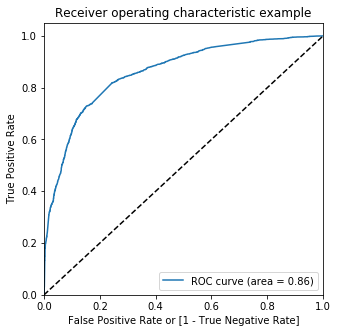

In [147]:
#plotting roc curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cut-Off Points

In [148]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.314642,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.318541,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.362234,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.675090,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.314642,3934,0,1,1,1,1,0,0,0,0,0,0


In [149]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.520872  0.983374  0.235882
0.2   0.2  0.694805  0.895783  0.570965
0.3   0.3  0.776129  0.821573  0.748126
0.4   0.4  0.803803  0.703163  0.865817
0.5   0.5  0.800557  0.649635  0.893553
0.6   0.6  0.787260  0.576642  0.917041
0.7   0.7  0.764069  0.480941  0.938531
0.8   0.8  0.738250  0.367397  0.966767
0.9   0.9  0.694032  0.209651  0.992504


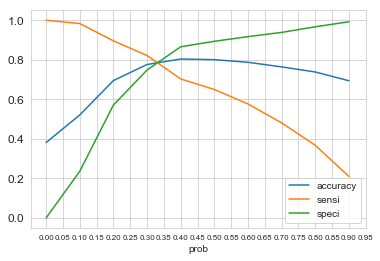

In [152]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

- From the above curve, 0.314 looks like the optimum point to take the cut off

In [153]:
#Let us make the final prediction using 0.314 as the cut off
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.314 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.314642,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.318541,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.362234,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.675090,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.314642,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [154]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7804576376004947

In [155]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3033,  969],
       [ 451, 2015]])

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8171127331711273

In [158]:
#Let us calculate specificity
TN / float(TN+FP)

0.7578710644677661

In [159]:
#Calculate false postive rate - predicting converted when leads have not converted
print(FP/ float(TN+FP))

0.24212893553223389


In [160]:
#Positive predictive value 
print (TP / float(TP+FP))

0.6752680965147453


In [161]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8705510907003444


#### Precision and Recall

In [162]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3576,  426],
       [ 864, 1602]])

In [163]:
from sklearn.metrics import precision_score, recall_score

In [164]:
#precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7899408284023669

In [165]:
#recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6496350364963503

#### Precision and Recall trade off

In [166]:
from sklearn.metrics import precision_recall_curve

In [167]:
#checking values of converted and predicted
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      1
 23      1
 24      1
 25      

In [168]:
#precision, recall at different thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

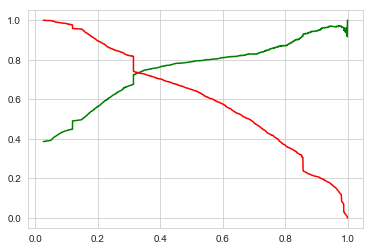

In [169]:
#Plotting to observe tradeoff btw precision & recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 8.Model Evaluation

In [170]:
#checking the head of test set
x_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management Specialization,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
4269,0,8.0,1011,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7766,0,5.0,59,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9199,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4359,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [171]:
#scaling features of test set before evaluating model on test set
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [172]:
#checking head
x_test = x_test[col]
x_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0
2376,0,-0.885371,1,0,0,0,1,0
7766,0,-0.777416,0,0,0,0,0,1
9199,0,-0.885371,0,1,0,0,1,0
4359,0,-0.885371,1,0,0,0,1,0


In [173]:
#adding a constant
x_test_sm = sm.add_constant(x_test)

In [174]:
#predicting values
y_test_pred = res.predict(x_test_sm)

In [175]:
#checking the predicted values
y_test_pred[:10]

4269    0.283942
2376    0.856387
7766    0.713071
9199    0.314642
4359    0.856387
9186    0.375308
1631    0.573369
8963    0.231441
8007    0.094133
5324    0.195127
dtype: float64

In [176]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
#Let's look at predicted y values
y_pred_1.head()

,0
4269,0.283942
2376,0.856387
7766,0.713071
9199,0.314642
4359,0.856387


In [178]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [179]:
#Putting LeadId to index
y_test_df['LeadId'] = y_test_df.index

In [180]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
#checking the head
y_pred_final.head()

,Converted,LeadId,0
0,1,4269,0.283942
1,1,2376,0.856387
2,1,7766,0.713071
3,0,9199,0.314642
4,1,4359,0.856387


In [183]:
#Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [184]:
#Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [185]:
#checking the head
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4269,1,0.283942
1,2376,1,0.856387
2,7766,1,0.713071
3,9199,0,0.314642
4,4359,1,0.856387


In [186]:
#Based on cut off threshold using accuracy, sensitivity and specificity of 0.31%
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.314 else 0)

In [187]:
#checking the head
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4269,1,0.283942,0
1,2376,1,0.856387,1
2,7766,1,0.713071,1
3,9199,0,0.314642,1
4,4359,1,0.856387,1


In [188]:
#Now let us calculate the lead score
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,4269,1,0.283942,0,28
1,2376,1,0.856387,1,86
2,7766,1,0.713071,1,71
3,9199,0,0.314642,1,31
4,4359,1,0.856387,1,86
5,9186,1,0.375308,1,38
6,1631,1,0.573369,1,57
7,8963,1,0.231441,0,23
8,8007,0,0.094133,0,9
9,5324,1,0.195127,0,20


In [189]:
#checking if 80% cases are correctly predicted based on the converted column.
#get the total of final predicted conversion or non conversion counts from the actual converted rates
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    910
0    185
Name: final_predicted, dtype: int64

In [190]:
#check the precentage of final_predicted conversions on test data
910/float(910+185)

0.8310502283105022

In [191]:
#Let's check the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7846320346320347

In [192]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1265,  412],
       [ 185,  910]])

In [193]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [194]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8310502283105022

In [195]:
#Let us calculate specificity
TN / float(TN+FP)

0.7543231961836613

In [196]:
#precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

#recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.6883509833585476
recall  0.8310502283105022


##### Plotting to Observe trade-off between Precision & Recall 

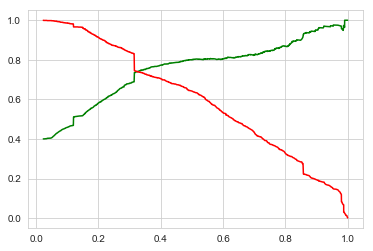

In [197]:
#plotting the precision recall curve
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 9.Result


### Train Set
- Sensitivity: 81.71%
- Specificity: 75.78%
- Accuracy: 78.04%
- Precision: 78.99%
- Recall: 64.69%

### Test Set
- Sensitivity: 83.1% 
- Specificity: 75.43%
- Accuracy: 78.46%
- Precision: 68.83%
- Recall: 83.1%




### Top 3 variables that  contribute the most towards the probability of a lead getting converted

- CurrentOccupation_Working Professional
- Lead Origin_Lead Add Form
- Lead Source_Welingak Website

#### Lead conversion rate: 83.10%